In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
%matplotlib inline
plt.style.use('ggplot')

df=pd.read_pickle('30knew.pkl')

In [3]:
caches=df['cache'].unique()
sites=df['sitename'].unique()


mat= np.zeros((int(sites.size), 5))
heat_total=pd.DataFrame(data=mat, columns=caches, index=sites)
heat_total.head(5)

,root://data.ci-connect.net,root://xrd-cache-1.t2.ucsd.edu,root://osgxroot.usatlas.bnl.gov,root://hcc-stash.unl.edu,root://mwt2-stashcache.campuscluster.illinois.edu
MWT2_CE_UIUC,0.0,0.0,0.0,0.0,0.0
UCSDT2-C,0.0,0.0,0.0,0.0,0.0
SU-OG-CE1,0.0,0.0,0.0,0.0,0.0
Crane-CE1,0.0,0.0,0.0,0.0,0.0
Red,0.0,0.0,0.0,0.0,0.0


In [4]:
length=df.shape[0]
heat_fails=heat_total.copy(deep=True)
heat_percentage=heat_total.copy(deep=True)

for i in range(length):
    site=df['sitename'].iloc[i]
    cache=df['cache'].iloc[i]
    host=df['host'].iloc[i]
    if df['tries'].iloc[i]=='3':
        heat_fails.at[site,cache]+=1
        heat_total.at[site,cache]+=1
        heat_total.at[site,host]+=1
    if df['tries'].iloc[i]=='1':
        heat_total.at[site,cache]+=1

    

In [5]:
#heat_total.index

heat_total


,root://data.ci-connect.net,root://xrd-cache-1.t2.ucsd.edu,root://osgxroot.usatlas.bnl.gov,root://hcc-stash.unl.edu,root://mwt2-stashcache.campuscluster.illinois.edu
MWT2_CE_UIUC,6047.0,0.0,0.0,0.0,1138.0
UCSDT2-C,0.0,460.0,0.0,0.0,0.0
SU-OG-CE1,1806.0,0.0,1890.0,0.0,0.0
Crane-CE1,1.0,0.0,0.0,2116.0,0.0
Red,0.0,0.0,0.0,498.0,0.0
red-gateway2,2.0,0.0,0.0,1193.0,0.0
red-gateway1,1.0,0.0,0.0,1151.0,0.0
GLOW-OSG,305.0,0.0,0.0,0.0,0.0
Sandhills-CE1,0.0,0.0,0.0,1688.0,0.0
Hyak_CE,330.0,1312.0,0.0,0.0,0.0


In [6]:
heat_fails
heat_fails.iloc[2,2]

1806.0

In [7]:
import math
rows=heat_fails.shape[0]

for i in range(rows):
    for j in range(5):
        num=heat_fails.iloc[i,j]/heat_total.iloc[i,j]
        if math.isnan(num):
            num=0
        heat_percentage.iloc[i,j]=num
        


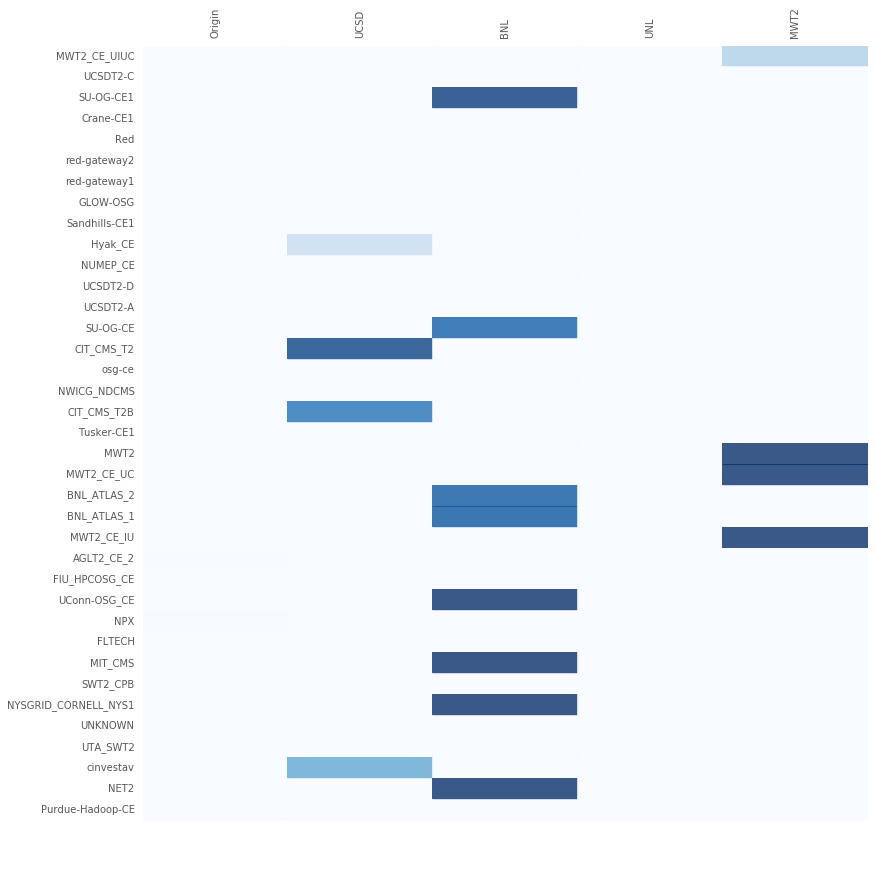

In [8]:
heat_percentage

fig, ax = plt.subplots()
heatmap = ax.pcolor(heat_percentage, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(13, 15)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(heat_percentage.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(heat_percentage.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

labels = ['Origin','UCSD','BNL','UNL', 'MWT2']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(heat_percentage.index, minor=False)

# rotate the
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False


In [9]:
fig.savefig('heatmap.png')

In [22]:
mat2= np.empty((int(sites.size), 3))
mapdata=pd.DataFrame(columns=['caches', 'IP','Coordinates'], index=sites)
mapdata.head(5)

print (mapdata.index[3])
mapdata

Crane-CE1


,caches,IP,Coordinates
MWT2_CE_UIUC,NaN,NaN,NaN
UCSDT2-C,NaN,NaN,NaN
SU-OG-CE1,NaN,NaN,NaN
Crane-CE1,NaN,NaN,NaN
Red,NaN,NaN,NaN
red-gateway2,NaN,NaN,NaN
red-gateway1,NaN,NaN,NaN
GLOW-OSG,NaN,NaN,NaN
Sandhills-CE1,NaN,NaN,NaN
Hyak_CE,NaN,NaN,NaN


In [23]:
import urllib

for i in range(sites.size):
    for j in range(df.shape[0]):
        if mapdata.index[i]==df['sitename'].iloc[j]:
            site=mapdata.index[i]
            cache=df['cache'].iloc[j]
            #print (site)
            #print(cache)
            #caches=str(mapdata.at[site,'caches'])
            #if cache not in caches:
            mapdata.at[site,'caches']=cache
                #mapdata.at[site,'caches']=cache
            mapdata.at[site,'IP']=df['IP'].iloc[j]
            break
                
    

mapdata



,caches,IP,Coordinates
MWT2_CE_UIUC,root://data.ci-connect.net,192.170.227.47,NaN
UCSDT2-C,root://xrd-cache-1.t2.ucsd.edu,169.228.131.42,NaN
SU-OG-CE1,root://osgxroot.usatlas.bnl.gov,128.230.18.42,NaN
Crane-CE1,root://hcc-stash.unl.edu,129.93.227.94,NaN
Red,root://hcc-stash.unl.edu,129.93.183.103,NaN
red-gateway2,root://hcc-stash.unl.edu,129.93.183.103,NaN
red-gateway1,root://hcc-stash.unl.edu,129.93.183.104,NaN
GLOW-OSG,root://data.ci-connect.net,128.105.245.196,NaN
Sandhills-CE1,root://hcc-stash.unl.edu,129.93.244.238,NaN
Hyak_CE,root://xrd-cache-1.t2.ucsd.edu,198.48.92.21,NaN


In [12]:

mapdata.to_pickle('mapdata.pkl')

In [13]:
import urllib 
import json
import codecs

ip='128.211.155.32'
bnl='192.12.15.165'
url='http://ip-api.com/json/'+bnl

req=urllib.request.Request(url)
out=urllib.request.urlopen(req).read()

#response = url.urlopen('http://api.hostip.info/get_html.php?ip=128.211.155.32&position=true').read()
print(out)

str_response = out.decode('utf-8')
obj = json.loads(str_response)

#reader = codecs.getreader("utf-8")
#obj = json.load(reader(out))

print(type(obj))
print(obj['as'])

b'{"as":"AS43 Brookhaven National Laboratory","city":"Upton","country":"United States","countryCode":"US","isp":"Brookhaven National Laboratory","lat":40.8695,"lon":-72.8868,"org":"Brookhaven National Laboratory","query":"192.12.15.165","region":"NY","regionName":"New York","status":"success","timezone":"America/New_York","zip":"11973"}'
<class 'dict'>
AS43 Brookhaven National Laboratory


In [24]:
lats2=[]
lons2=[]
mapdata.sort(mapdata['caches'],ascending=[False])
print(mapdata)
for i in range(sites.size):
    ip=mapdata['IP'].iloc[i]
    url='http://ip-api.com/json/'+ip
    req=urllib.request.Request(url)
    out=urllib.request.urlopen(req).read()
    str_response = out.decode('utf-8')
    obj = json.loads(str_response)
    lat=obj['lat']
    lon=obj['lon']
    mapdata['Coordinates'].iloc[i]=(lat,lon)
    lats2.append(lat)
    lons2.append(lon)
    
    
print (mapdata.index.tolist())
print (lats2)
print (lons2)

/home/ivukotic/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


KeyError: "['root://data.ci-connect.net' 'root://xrd-cache-1.t2.ucsd.edu'\n 'root://osgxroot.usatlas.bnl.gov' 'root://hcc-stash.unl.edu'\n 'root://hcc-stash.unl.edu' 'root://hcc-stash.unl.edu'\n 'root://hcc-stash.unl.edu' 'root://data.ci-connect.net'\n 'root://hcc-stash.unl.edu' 'root://xrd-cache-1.t2.ucsd.edu'\n 'root://data.ci-connect.net' 'root://xrd-cache-1.t2.ucsd.edu'\n 'root://xrd-cache-1.t2.ucsd.edu' 'root://osgxroot.usatlas.bnl.gov'\n 'root://xrd-cache-1.t2.ucsd.edu'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'\n 'root://data.ci-connect.net' 'root://xrd-cache-1.t2.ucsd.edu'\n 'root://hcc-stash.unl.edu'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'\n 'root://osgxroot.usatlas.bnl.gov' 'root://osgxroot.usatlas.bnl.gov'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'\n 'root://data.ci-connect.net'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'\n 'root://osgxroot.usatlas.bnl.gov' 'root://data.ci-connect.net'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'\n 'root://osgxroot.usatlas.bnl.gov' 'root://hcc-stash.unl.edu'\n 'root://osgxroot.usatlas.bnl.gov' 'root://data.ci-connect.net'\n 'root://hcc-stash.unl.edu' 'root://xrd-cache-1.t2.ucsd.edu'\n 'root://osgxroot.usatlas.bnl.gov'\n 'root://mwt2-stashcache.campuscluster.illinois.edu'] not in index"